In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv("Churn_Modelling.csv")


In [5]:
df.columns = df.columns.str.strip()


In [8]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


In [9]:
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])


In [10]:
X = df.drop('Exited', axis=1)
y = df['Exited']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)


0.8645

In [14]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [15]:
confusion_matrix(y_test, y_pred)


array([[1546,   61],
       [ 210,  183]], dtype=int64)

In [16]:
feature_importance = pd.Series(
    model.feature_importances_, index=X.columns
).sort_values(ascending=False)

feature_importance


Age                0.240453
EstimatedSalary    0.148004
CreditScore        0.142369
Balance            0.138670
NumOfProducts      0.132061
Tenure             0.080932
IsActiveMember     0.042807
Geography          0.037402
Gender             0.019032
HasCrCard          0.018269
dtype: float64

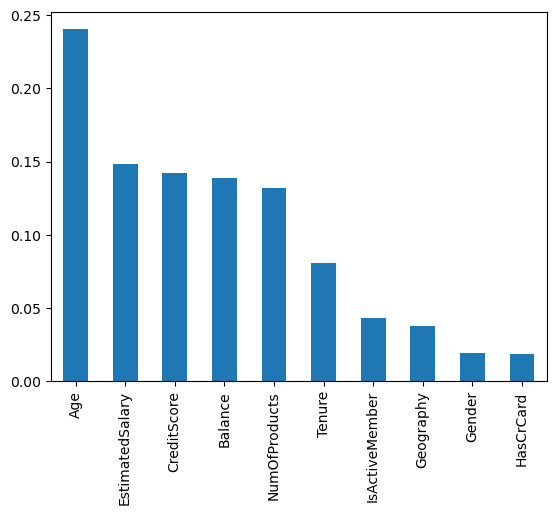

In [17]:
feature_importance.plot(kind='bar')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_5092\887874575.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")


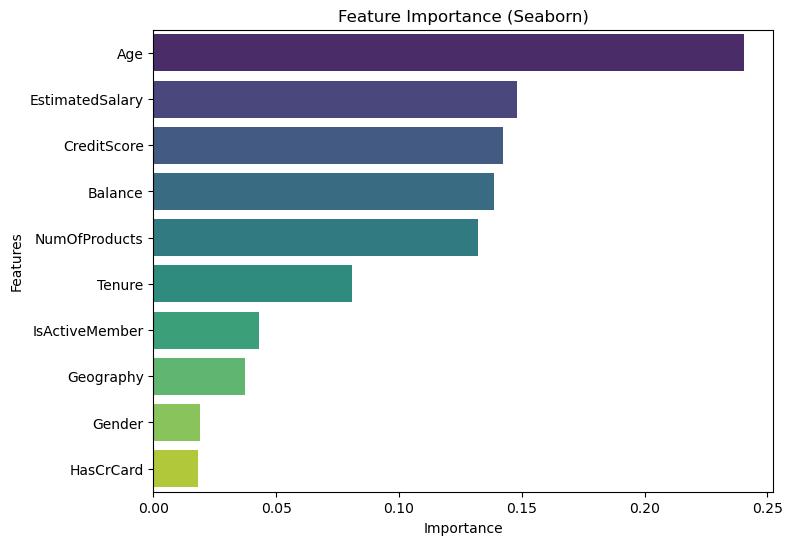

In [18]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Seaborn)")
plt.show()
